# Project World Cup Sticker Album
  

*   Stickers quantity: 480
*   stickers pack price: €1,00
*   Stickers per pack: 5

## Supositions

1. All stickers have an equal probability of being draw;
2. One pack is purchase at a time until completing the album. 

## Algorithm

1. Buy a sticker pack;
2. Put in the album and check if is complete;
3. If incomplete, buy another pack. If filled, stop.
 
### Answered questions:
1. Average cost to complete the album;
2. Average packs purchased to complete the album;
3. What is the empirical distribuition of cost to complete the album;
4. Probability of cost to be under €4500
5. Probability to cost more than the average cost;
6. reliability interval of 95% of the total amount to complete the album;
7. Average cost when completing 2 albuns with one friend?
8. Average cost when completing 3 albuns with two friends?


In [45]:
# Boundary conditions
n_stickers = 670
pack_cost = 5
sticker_per_pack = 5
album_cost = 15

In [51]:
import numpy as np
import math

In [37]:
def SimuleAlbum():
  album = np.zeros(n_stickers)
  packs = 0
  while True:
    pack = np.random.choice(np.arange(0,n_stickers), size = 5)
    packs += 1

    for i in [0, 1, 2, 3, 4]:
      album[pack[i]] += 1

    if np.all(album >= 1):
      break

  cost = packs*pack_cost + album_cost
  return cost

In [91]:
S = 1000

results = []

for i in range(S):
  person = SimuleAlbum()
  results.append(person)

# to follow the simulation running:
  #if i % 500 == 0:
   #print(i)

sim = np.array(results)
average_cost = np.array(results).mean()


In [74]:
# Question 1
print("The average cost to complete the album is:",(average_cost), "euros")

The average cost to complete the album is: 4750.9 euros


In [80]:
#Question 2
  #average cost, without album cost, divided by stickers pack price, 
print("The minimun sticker packs purchased with this average cost is:",math.ceil(((Average_cost-album_cost)/pack_cost)))


The minimun sticker packs purchased with this average cost is: 973


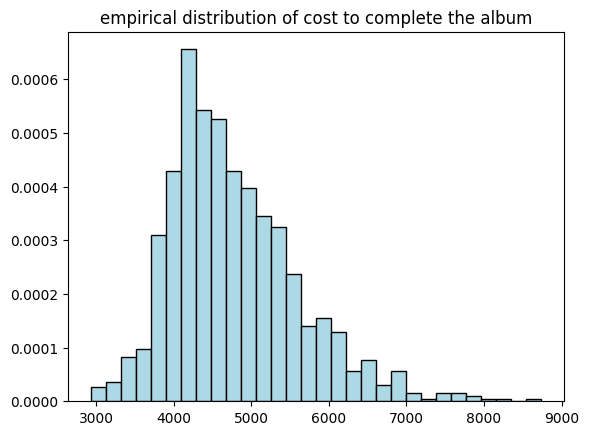

In [99]:
# Question 3

import matplotlib.pyplot as plt
plt.hist(sim, bins = 30, density = True, color = 'lightblue', edgecolor = 'black')
plt.title("empirical distribution of cost to complete the album")
plt.show()

In [96]:
#Question 4

prob1 = sum(np.array(sim) < 4500) / S

print("The Probability of cost to be under €4500 is {:.2f}%".format(prob1*100))

The Probability of cost to be under €4500 is 43.50%


In [98]:
# Question 5

prob2 = sum(np.array(sim) > np.array(sim).mean()) / S

print("The probability of spending more than the average is {:.2f}%".format(prob2*100))

The probability of spending more than the average is 42.90%


In [104]:
# Question 6

reli = np.quantile(sim, [0.025, 0.975])

print("The reliability interval of 95% is:", reli)

The reliability interval of 95% is: [3489.875 6845.25 ]


In [108]:
# Question 7

def SimuleAlbum(n_friends):
  album = np.zeros(n_stickers)
  packs = 0
  while True:
    pack = np.random.choice(np.arange(0,n_stickers), size = 5)
    packs += 1

    for i in [0, 1, 2, 3, 4]:
      album[pack[i]] += 1

    if np.all(album >= n_friends):
      break

  cost = packs*pack_cost + album_cost
  return cost/n_friends

In [ ]:
S = 1000

results = []

for i in range(S):
  person = SimuleAlbum(n_friends)
  results.append(person)

# to follow the simulation running:
  #if i % 500 == 0:
   #print(i)

sim = np.array(results)
average_cost = np.array(results).mean()

In [116]:
print("The average cost when completing the album with one friend is:", (SimuleAlbum(2)))

The average cost when completing the album with one friend is: 3275.0


In [118]:
#Question 8
print("The average cost when completing the album with two friend is:", (SimuleAlbum(3)))

The average cost when completing the album with two friend is: 2468.3333333333335
